In [0]:
import numpy as np
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['telecom_churn.csv']))

In [85]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [86]:
print(df.shape)

(3333, 20)


In [87]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [0]:
# Изменим тип колонки Churn на числовой

df['Churn'] = df['Churn'].astype('int64')

In [89]:
# Выделим категориальные признаки

object_cols = list(df.select_dtypes(include='object').columns)
object_cols

['State', 'International plan', 'Voice mail plan']

In [0]:
# Напишем функцию для применения one-hot encoding к этим признакам

def one_hot_encoding(train, col):
  dummies = pd.get_dummies(train[col], prefix=col, dummy_na=False)
  return dummies

In [91]:
# Выведем степень оттока пользователй по штатам

df.groupby(['State'])['Churn'].agg(['count'])

,count
State,
AK,52
AL,80
AR,55
AZ,64
CA,34
CO,66
CT,74
DC,54
DE,61


In [92]:
# Посмотрим, какой отток в среднем по штатам, минимальное и максимальное значение

agg = df.groupby(['State'])['Churn'].agg(['count'])
print("min={}".format(agg.min()))
print("max={}".format(agg.max()))
print("mean={}".format(agg.mean()))

min=count    34
dtype: int64
max=count    106
dtype: int64
mean=count    65.352941
dtype: float64


In [0]:
# Разобъем штаты на категории по оттоку: (30,50), (50,70), (70,90), (90,110)

def encode_state(states, count_range):
  res = []
  for state in states:
    if agg['count'][state] in count_range:
      res.append(1)
    else:
      res.append(0)

  return res

In [0]:
df['State_1'] = encode_state(df['State'].values, range(30,50))
df['State_2'] = encode_state(df['State'].values, range(50,70))
df['State_3'] = encode_state(df['State'].values, range(70,90))
df['State_4'] = encode_state(df['State'].values, range(90,110))

In [95]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0


In [96]:
# Проверим, какие значения есть в International plan

df['International plan'].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

In [97]:
# Приведем International plan к числовому виду

d = {'No' : 0, 'Yes' : 1}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0


In [98]:
# Проверим, какие значения есть в 'Voice mail plan'

df['Voice mail plan'].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

In [99]:
df['Voice mail plan'] = df['Voice mail plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0


In [100]:
# Проверим, какие значения есть в 'Area code'

df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [101]:
# Применяем one_hot_encoding к 'Area code'

ac_dummies = one_hot_encoding(df, 'Area code')
ac_dummies

,Area code_408,Area code_415,Area code_510
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
3328,0,1,0
3329,0,1,0
3330,0,0,1
3331,0,0,1


In [102]:
df = pd.concat([df, ac_dummies], axis=1)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_1,State_2,State_3,State_4,Area code_408,Area code_415,Area code_510
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,1,0,0,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,1,0,0,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,1,0,0,0,1,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,1,0,1,0,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,1,0,0,0,1,0


In [0]:
# Опишем функцию для проверки распределения данных

%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro
from scipy.stats import normaltest
import matplotlib.pyplot as plt

def analyze(data):
  plt.style.use('ggplot')
  np.var(data)
  plt.hist(data, bins=60)
  print("mean : ", np.mean(data))
  print("var  : ", np.var(data))
  print("skew : ", skew(data))
  print("kurt : ", kurtosis(data))
  print("shapiro : ", shapiro(data))
  print("normaltest : ", normaltest(data))

In [0]:
# Стандартизируем данные

columns = ['Account length','Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls']

In [0]:
df_temp = df[columns]

from sklearn.preprocessing import StandardScaler # MinMaxScaler RobustScaler
scaler = StandardScaler()
scaler.fit(df_temp)

df_temp_prep = scaler.transform(df_temp)
df[columns] = df_temp_prep

In [106]:
# Подгатавливаем данные для обучения модели

from sklearn.model_selection import train_test_split
cols = columns + ['State_1', 'State_2', 'State_3', 'State_4', 'Area code_408', 'Area code_415', 'Area code_510']
print(cols)

['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'State_1', 'State_2', 'State_3', 'State_4', 'Area code_408', 'Area code_415', 'Area code_510']


In [0]:
X = df[cols].values
Y = df['Churn'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [108]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(2666, 22) (2666,)
(667, 22) (667,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [0]:
from sklearn.model_selection import GridSearchCV

# Функция для поиска лучших параметров модели
def gridSearchResults(classifier, grid_params, x, y):
  gs = GridSearchCV(
      classifier,
      grid_params,
      verbose = 1,
      cv = 3,
      n_jobs = -1
  )

  gsResults = gs.fit(x, y)
  print("Best Score: {}".format(gsResults.best_score_))
  print("Best Estimator: {}".format(gsResults.best_estimator_))
  print("Best Params: {}".format(gsResults.best_params_))

  return gsResults.best_params_

In [0]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, precision_score, auc, roc_auc_score
import matplotlib.pyplot as plt

# функция для анализа модели
def value_of_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))  
    print('F1: ', f1_score(y_true, y_pred))
    print('Roc_AUC: ', roc_auc_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title('My DataSet')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def test_model(title, model, X_train, Y_train, Y_test):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print(title)
  value_of_metrics(Y_test, Y_pred)

In [0]:
# Функция для тестирования моделей

def test_models(X_train, Y_train):
  # Ищем оптимальные параметры для kNN
  grid_params = {
      'n_neighbors': [3,5,10,15,20,25,30],
      'weights': ['uniform', 'distance'],
      'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
  }
  kNN_best_params = gridSearchResults(KNeighborsClassifier(), grid_params, X_train, Y_train)

  # Ищем лучшие параметры для GaussianNB
  grid_params = {
      'var_smoothing': [1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
  }
  gaussian_best_params = gridSearchResults(GaussianNB(), grid_params, X_train, Y_train)

  # Ищем лучшие параметры для BernoulliNB
  grid_params = {
      'alpha': [0,0.2,0.5,0.75,1.0,1.5,2.0],
      'fit_prior': [False, True],
      'binarize': [0,0.2,0.5,0.75,1.0,1.5,2.0]
  }
  bernoulli_best_params = gridSearchResults(BernoulliNB(), grid_params, X_train, Y_train)

  # Ищем лучшие параметры для SVM
  grid_params = {
      'C': [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0],
      'kernel': ['poly', 'rbf', 'sigmoid'],
      'degree': [1,2,3,5],
      'decision_function_shape': ['ovo', 'ovr']
  }
  svm_best_params = gridSearchResults(svm.SVC(), grid_params, X_train, Y_train)

  # Проверяем модели с найденными параметрами
  # kNN
  test_model("kNN Model", KNeighborsClassifier(**kNN_best_params), X_train, Y_train, Y_test)

  # Gaussian
  test_model("GaussianNB Model", GaussianNB(**gaussian_best_params), X_train, Y_train, Y_test)

  # Bernoulli
  test_model("BernoulliNB Model", BernoulliNB(**bernoulli_best_params), X_train, Y_train, Y_test)

  # SVM
  test_model("SVM Model", svm.SVC(**svm_best_params), X_train, Y_train, Y_test)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8773426125788331
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Best Params: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Best Score: 0.8743480544661647
Best Estimator: GaussianNB(priors=None, var_smoothing=0.01)
Best Params: {'var_smoothing': 0.01}
Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8597134817607258
Best Estimator: BernoulliNB(alpha=0, binarize=2.0, class_prior=None, fit_prior=True)
Best Params: {'alpha': 0, 'binarize': 2.0, 'fit_prior': True}
Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   48.9s finished


Best Score: 0.9047239027553987
Best Estimator: SVC(C=4.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Params: {'C': 4.0, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf'}
kNN Model
Accuracy:  0.8845577211394303
Recall:  0.2871287128712871
Precision:  0.8529411764705882
F1:  0.4296296296296296
Roc_AUC:  0.6391473953049015


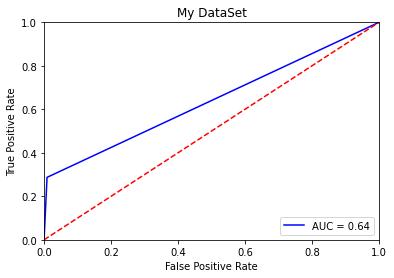

GaussianNB Model
Accuracy:  0.8770614692653673
Recall:  0.36633663366336633
Precision:  0.6727272727272727
F1:  0.47435897435897434
Roc_AUC:  0.6672672567610117


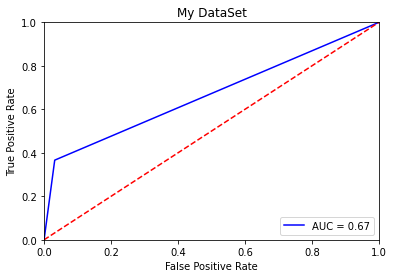

BernoulliNB Model
Accuracy:  0.8470764617691154
Recall:  0.1782178217821782
Precision:  0.4864864864864865
F1:  0.2608695652173913
Roc_AUC:  0.5723244585942693


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


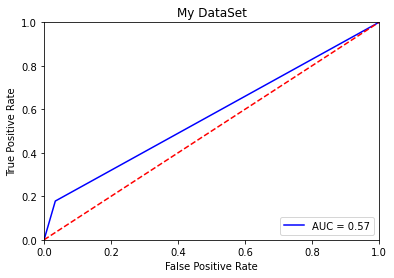

SVM Model
Accuracy:  0.9115442278860569
Recall:  0.48514851485148514
Precision:  0.875
F1:  0.6242038216560509
Roc_AUC:  0.7363905118427038


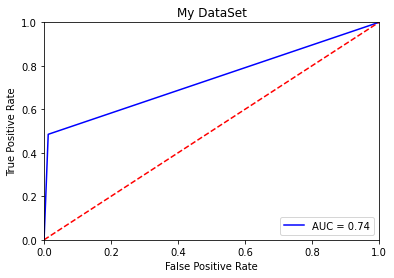

In [77]:
test_models(X_train, Y_train)

Попробуем нормализовать данные, далекие от нормальных и посмотрим, что получится

In [0]:
# Опишем функцию для нормализации данных
# Используем тест Шапиро и выбираем наилучший результат

from sklearn.preprocessing import PowerTransformer

def normalize(data, train):
  tests = [[data, shapiro(data)]]

  box_cox_transform = PowerTransformer(method='box-cox', standardize=False) # only works with strictly positive values
  yeo_johnson_transform = PowerTransformer(method='yeo-johnson', standardize=False) # works with positive and negative values

  box_cox = data
  if (data.values.min() > 0):
    box_cox = box_cox_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  yeo_johnson = yeo_johnson_transform.fit_transform(data.values.reshape(train.shape[0],-1))
  log = np.log(data.values.reshape(train.shape[0],-1))

  tests.append([box_cox,shapiro(box_cox)])
  tests.append([yeo_johnson,shapiro(yeo_johnson)])
  tests.append([log,shapiro(log)])

  res = tests[0]
  for i in range(1,len(tests)-1):
    if tests[i][1][1] > res[1][1]:
      res = tests[i]
  
  return res[0]

In [0]:
# Опишем функцию для выборки данных, далеких от нормальных

def get_not_normalized(data, threshold):
  res = []
  for col in data.columns:
    if shapiro(data[col])[1] < threshold:
      res.append(col)

  return res

In [116]:
# Выбираем данные, далекие от нормальных

not_norm_columns = get_not_normalized(df[columns], 0.8)
not_norm_columns

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

In [120]:
# Пробуем нормализовать данные, далекие от нормальных

for col in not_norm_columns:
  df[col] = normalize(df[col], df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14:

In [0]:
# Еще раз подготовим данные для тестирования

X = df[cols].values
Y = df['Churn'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8690911102328425
Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')
Best Params: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Fitting 3 folds for each of 13 candidates, totalling 39 fits
Best Score: 0.878470849927543
Best Estimator: GaussianNB(priors=None, var_smoothing=0.1)
Best Params: {'var_smoothing': 0.1}
Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:    0.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Score: 0.8600884348915846
Best Estimator: BernoulliNB(alpha=0, binarize=1.5, class_prior=None, fit_prior=True)
Best Params: {'alpha': 0, 'binarize': 1.5, 'fit_prior': True}
Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   50.3s finished


Best Score: 0.8990974945699355
Best Estimator: SVC(C=3.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Params: {'C': 3.5, 'decision_function_shape': 'ovo', 'degree': 1, 'kernel': 'rbf'}
kNN Model
Accuracy:  0.8740629685157422
Recall:  0.1782178217821782
Precision:  0.9473684210526315
F1:  0.3
Roc_AUC:  0.5882255186649407


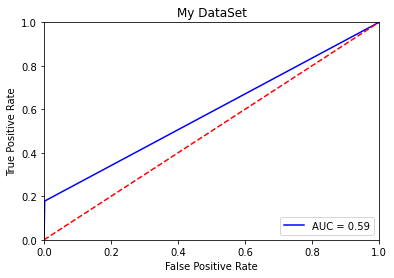

GaussianNB Model
Accuracy:  0.8770614692653673
Recall:  0.2871287128712871
Precision:  0.7435897435897436
F1:  0.41428571428571426
Roc_AUC:  0.6347304341741595


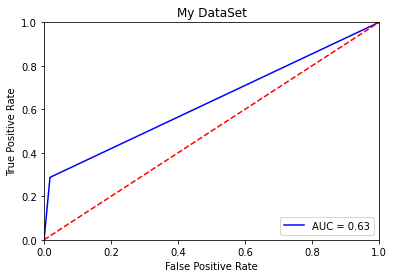

BernoulliNB Model
Accuracy:  0.8725637181409296
Recall:  0.31683168316831684
Precision:  0.6666666666666666
F1:  0.4295302013422819
Roc_AUC:  0.6442815659657839


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


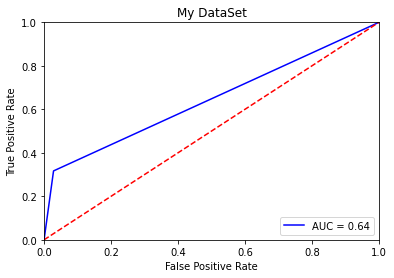

SVM Model
Accuracy:  0.9100449775112444
Recall:  0.4752475247524752
Precision:  0.8727272727272727
F1:  0.6153846153846154
Roc_AUC:  0.7314400167931988


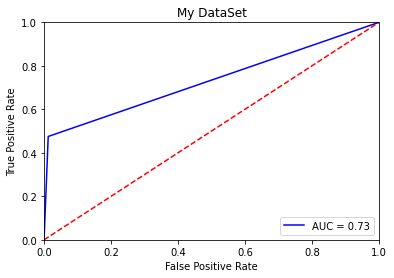

In [123]:
# Еще раз тестируем модели

test_models(X_train, Y_train)

In [124]:
# Заметных улучшений нет, выбираем SVM Model, как показавшую лучший результат

model = svm.SVC(C=3.5, decision_function_shape='ovo', degree=1, kernel='rbf')
model.fit(X_train,Y_train)
Y_pred = model.predict(X)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [132]:
np.array(range(1,len(Y_pred)))

array([   1,    2,    3, ..., 3330, 3331, 3332])

In [0]:
# Подготавливаем файл для Kaggle

res=pd.DataFrame()
res['Churn'] = Y_pred

In [0]:
res.to_csv("res.csv",index=False)

In [0]:
from google.colab import files
files.download('res.csv') 